In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#!pip install fancyimpute

In [4]:
cd '/content/drive/My Drive/intern/' 

/content/drive/My Drive/intern


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as scipy
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
import fancyimpute as fancyimpute

Using TensorFlow backend.


In [0]:
cbd = pd.read_csv('./input/Customer Bill Detail.csv', header = 0)
coid = pd.read_csv('./input/Customer Order Item Details.csv', header = 0)
mp = pd.read_csv('./input/Market Pricing.csv', header = 0)

In [6]:
cbd.head()

,Type,Date,Bill Number,Discount,Subtotal,Delivery Amt,Total Bill,Channel,Customer ID,Dish Details
0,Home Delivery,2018-06-01,20083931000,0.0,480.0,20,500,-,38271357206,"Tandoori Roti (QTY-1.000),Tandoori Roti (QTY-1..."
1,Dine In,2018-06-01,20083931328,0.0,450.0,0,450,-,UnKnown,"Tomato Soup (QTY-1.000),Masala Cheese Maggi (Q..."
2,Home Delivery,2018-06-01,20083931656,0.0,150.0,0,150,Zomato Online,249028087096,"Lachchha Paratha (QTY-1.000),Chicken Nilgir (Q..."
3,Home Delivery,2018-06-01,20083931984,0.0,160.0,0,160,Zomato Online,249225356278,Hyderabadi Chicken Fry Piece Biryani (QTY-1.000)
4,Home Delivery,2018-06-01,20083932312,0.0,160.0,0,160,Zomato Online,249229152321,Hyderabadi Mutton Dum Biryani (QTY-1.000)


In [7]:
cbd.dtypes

Type             object
Date             object
Bill Number       int64
Discount        float64
Subtotal        float64
Delivery Amt      int64
Total Bill        int64
Channel          object
Customer ID      object
Dish Details     object
dtype: object

In [8]:
coid.dtypes

Date           object
Bill Number     int64
Customer ID    object
Dish Name      object
Quantity        int64
dtype: object

In [9]:
coid.head(n = 10)

,Date,Bill Number,Customer ID,Dish Name,Quantity
0,01-06-2018,20083931328,UnKnown,Bhel,1
1,01-06-2018,20083931328,UnKnown,Cheese Chutney Half,1
2,01-06-2018,20083931328,UnKnown,Cold Drink,2
3,01-06-2018,20083931328,UnKnown,Cold Drink s,3
4,01-06-2018,20083931328,UnKnown,Hot Coffee,2
5,01-06-2018,20083931328,UnKnown,Masala Cheese Maggi,1
6,01-06-2018,20083931328,UnKnown,Tomato Soup,1
7,01-06-2018,20083931328,UnKnown,water bottle,2
8,01-06-2018,20083932968,UnKnown,Chicken Home Style,2
9,01-06-2018,20083932968,UnKnown,Chicken Tikka,1


In [10]:
mp.dtypes

Restaurant               object
Menu Header              object
Menu Item                object
Rate                     object
What people love here    object
dtype: object

In [11]:
mp.head(n = 20)

,Restaurant,Menu Header,Menu Item,Rate,What people love here
0,12 e,Veg Starters,Paneer Tikka,190,"Butter Chicken, Chicken Biryani"
1,12 e,Veg Starters,Paneer Peshawari Tikka,200,"Butter Chicken, Chicken Biryani"
2,12 e,Veg Starters,Paneer Kalimirch Tikka,190,"Butter Chicken, Chicken Biryani"
3,12 e,Veg Starters,Paneer Malai Tikka,200,"Butter Chicken, Chicken Biryani"
4,12 e,Veg Starters,Cheese Chilly Onion Kabah,160,"Butter Chicken, Chicken Biryani"
5,12 e,Veg Starters,Mushroom Tikka,160,"Butter Chicken, Chicken Biryani"
6,12 e,Veg Starters,Subz Sholai Kabab,160,"Butter Chicken, Chicken Biryani"
7,12 e,Non Veg Starters,Murg Tikka,240,"Butter Chicken, Chicken Biryani"
8,12 e,Non Veg Starters,Murg Malai Tikka,250,"Butter Chicken, Chicken Biryani"
9,12 e,Non Veg Starters,Murg Pahadi Tikka,240,"Butter Chicken, Chicken Biryani"


# Data Preprocessing

0. Finding Null Values and other information

In [12]:
#0a. Finding null values
null_cbd = cbd.isnull().sum()
null_coid = coid.isnull().sum()
null_mp = mp.isnull().sum()

print(null_cbd)
print('\n')
print(null_coid)
print('\n')
print(null_mp)

Type            0
Date            0
Bill Number     0
Discount        0
Subtotal        0
Delivery Amt    0
Total Bill      0
Channel         0
Customer ID     0
Dish Details    0
dtype: int64


Date           0
Bill Number    0
Customer ID    0
Dish Name      0
Quantity       0
dtype: int64


Restaurant                  0
Menu Header                 0
Menu Item                   0
Rate                       37
What people love here    2346
dtype: int64


1. Univariate Analysis

In [0]:
cbd.columns.values #We use deepcopy = False

array(['Type', 'Date', 'Bill Number', 'Discount', 'Subtotal',
       'Delivery Amt', 'Total Bill', 'Channel', 'Customer ID',
       'Dish Details'], dtype=object)

In [0]:
def uni_con_dist(data, to_leave):
  data.drop(to_leave, axis = 1, inplace = True)
  data[data.dtypes[((data.dtypes=="float64")|(data.dtypes=="int64"))].index.values].hist(figsize=[11,11])
  
  hist_data = {}
  for col in data[data.dtypes[((data.dtypes=="float64")|(data.dtypes=="int64"))].index.values].columns.values:
    hist_data[col + '_count'], hist_data[col + '_division'] = np.histogram(data[col])
  
  return hist_data


Discount_count :  [6946  799  548   66   14    3    0    1    0    1]
Discount_division :  [  0.   51.4 102.8 154.2 205.6 257.  308.4 359.8 411.2 462.6 514. ]
Subtotal_count :  [8003  303   36   20    4    4    1    4    2    1]
Subtotal_division :  [   0.   633.8 1267.6 1901.4 2535.2 3169.  3802.8 4436.6 5070.4 5704.2
 6338. ]
Delivery Amt_count :  [8199    0  111    0   55    0    7    0    4    2]
Delivery Amt_division :  [ 0.  5. 10. 15. 20. 25. 30. 35. 40. 45. 50.]
Total Bill_count :  [8050  260   32   20    4    4    1    4    2    1]
Total Bill_division :  [   0.   633.8 1267.6 1901.4 2535.2 3169.  3802.8 4436.6 5070.4 5704.2
 6338. ]


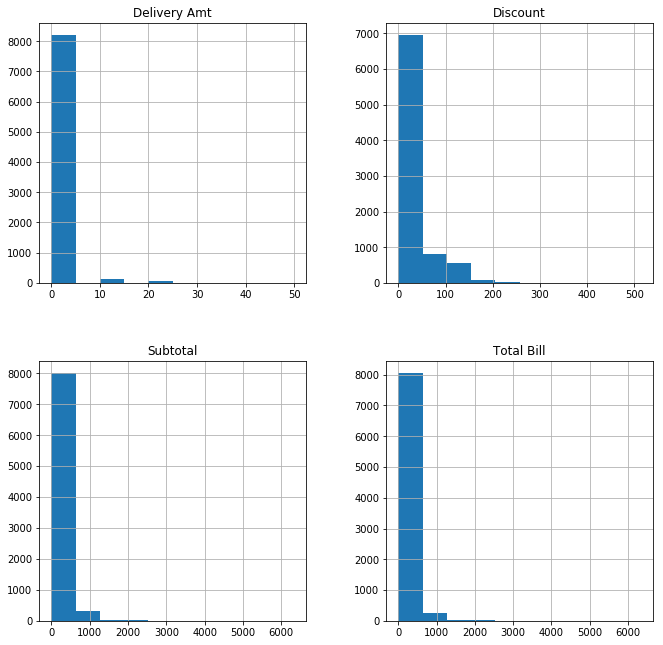

In [15]:
#1a.Univariate of cbd
hist_data = uni_con_dist(cbd.copy(deep = False), to_leave = 'Bill Number')
for key, value in hist_data.items():
  print(key, ': ', hist_data[key])

Ranges of different features in cbd is different. 
Needs Scaling/Normalisation

Quantity_count :  [16323   900   254    91    34     8     6     7     2     1]
Quantity_division :  [ 1.   4.9  8.8 12.7 16.6 20.5 24.4 28.3 32.2 36.1 40. ]


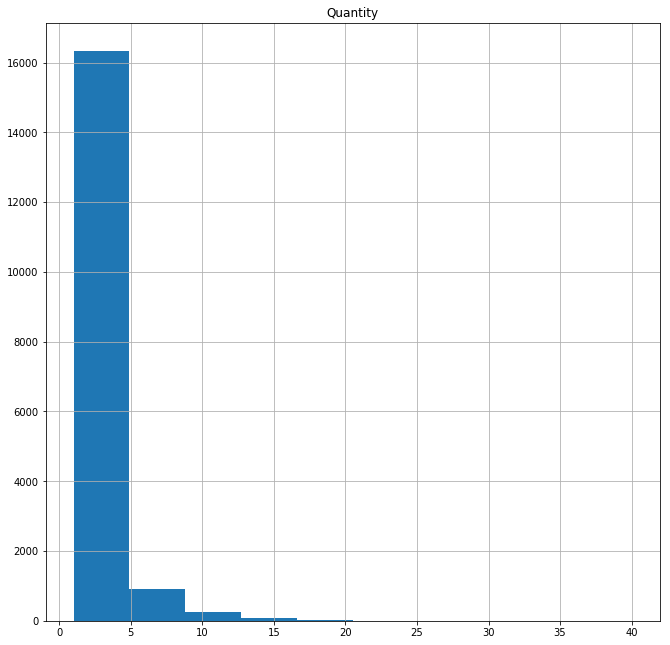

In [19]:
#1b.Univariate of coid
hist_data = uni_con_dist(coid.copy(deep = False), to_leave = 'Bill Number')
for key, value in hist_data.items():
  print(key, ': ', hist_data[key])

Each food item is bought in smaller quantities mostly.

Per order quantity also skewed towards low numbers. i.e. total food quantity  per order lies mostly between 0-7 ( or 0-6) 

2. Bivariate Analysis

In [0]:
#Biavariate Con-Con
def bi_con_con(data, to_leave, size = 10):
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    data.drop(to_leave, axis = 1, inplace = True)

    sns.pairplot(data.loc[:, data.dtypes[((data.dtypes=="float64")|(data.dtypes=="int64"))].index.values], size = size)
    data_corr = data.loc[:, data.dtypes[((data.dtypes=="float64")|(data.dtypes=="int64"))].index.values].corr()
    return data_corr

              Discount  Subtotal  Delivery Amt  Total Bill
Discount      1.000000 -0.054330     -0.052322   -0.102208
Subtotal     -0.054330  1.000000      0.066331    0.978654
Delivery Amt -0.052322  0.066331      1.000000    0.081211
Total Bill   -0.102208  0.978654      0.081211    1.000000


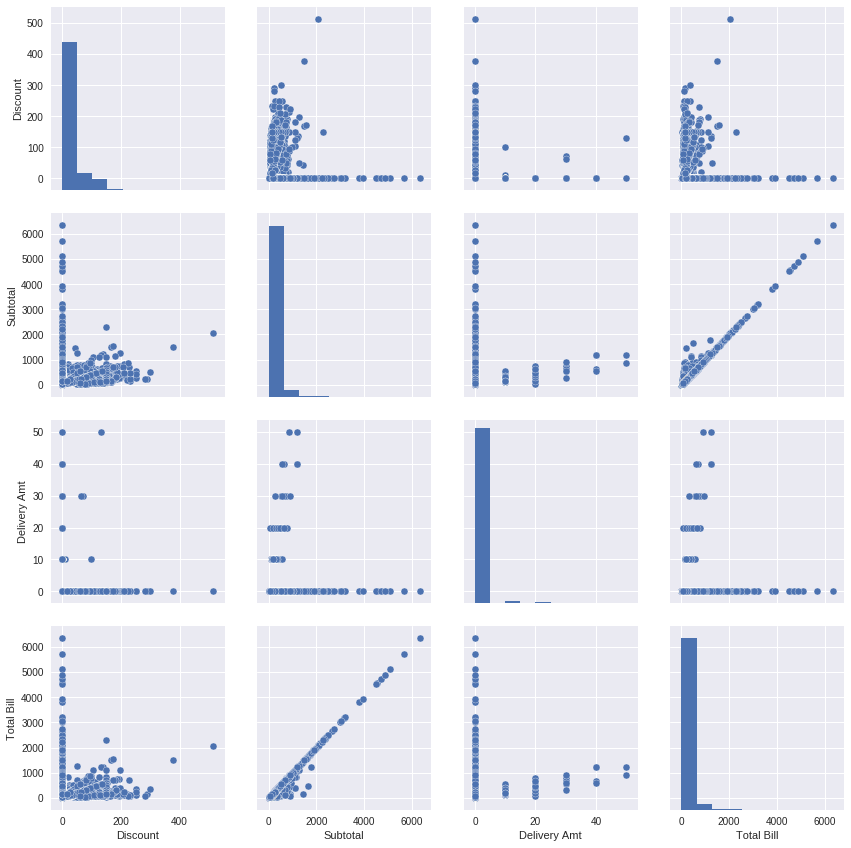

In [0]:
#2aa. Biavariate Con-Con of cbd
corr = bi_con_con(cbd.copy(deep = False), to_leave = 'Bill Number', size = 3)
print(corr)

Subtotal has high correlation with Total Bill, i.e, 0.978

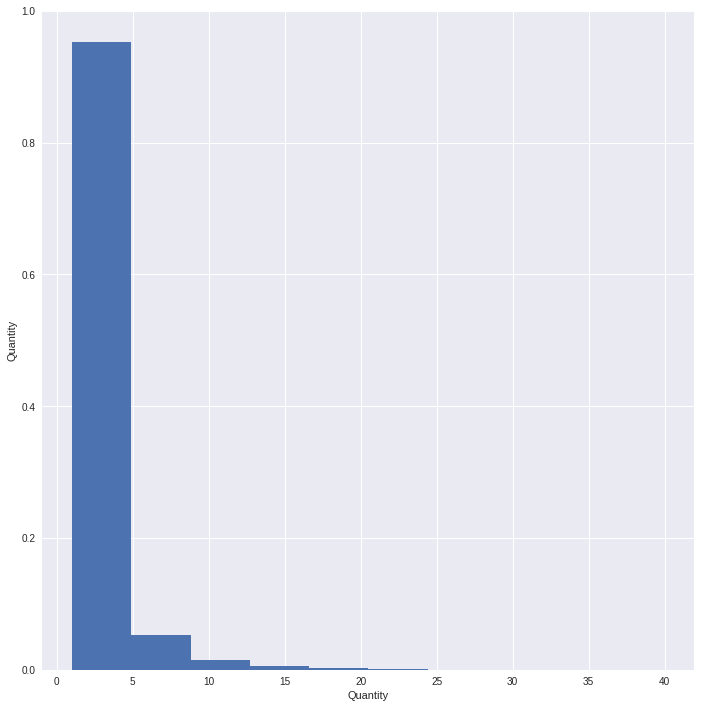

In [0]:
#2ba. Biavariate Con-Con of coid
bi_con_con(coid.copy(deep = False), to_leave = 'Bill Number')

In [0]:
#2ca. Biavariate Con-Con of mp
#No contin var -- YET.

Categorical & Categorical: To find the relationship between two categorical variables, we can use following methods:

    Two-way table: We can start analyzing the relationship by creating a two-way table of count and count%. The rows represents the category of one variable and the columns represent the categories of the other variable. We show count or count% of observations available in each combination of row and column categories.

In [0]:
#Biavariate Cat-Cat
def bi_cat_cat_2way(label1, label2, data):
  two_way = {}
  two_way['normal'] = pd.crosstab(index=data[label1], columns=data[label2], margins=True)# Usual 2 way table b/w 2 categorical vars
  two_way['total_prop'] = two_way['normal']/two_way['normal'].loc["All","All"] #to get the total proportion of counts in each cell,
                                                                               #divide the table by the grand total
  two_way['col_prop'] = two_way['normal']/two_way['normal'].loc["All", :]
  two_way['row_prop'] = (two_way['normal'].T/two_way['normal']['All']).T
  return two_way

In [0]:
#2ab i) Biavariate Cat-Cat of cbd by Two-way table

two_way_cbd = bi_cat_cat_2way('Type', 'Channel', data = cbd)
print(two_way_cbd['normal'])

Channel           -  Swiggy Online  Zomato COD  Zomato Online   All
Type                                                               
Dine In        1363             13           0             19  1395
Home Delivery   425            777         900           3933  6035
Take Away       925              3           4             16   948
All            2713            793         904           3968  8378


In [0]:
print(two_way_cbd['total_prop'])#to get the total proportion of counts in each cell, divide the table by the grand total

Channel               -  Swiggy Online  Zomato COD  Zomato Online       All
Type                                                                       
Dine In        0.162688       0.001552    0.000000       0.002268  0.166508
Home Delivery  0.050728       0.092743    0.107424       0.469444  0.720339
Take Away      0.110408       0.000358    0.000477       0.001910  0.113153
All            0.323824       0.094653    0.107902       0.473621  1.000000


In [0]:
print(two_way_cbd['col_prop'])#To get the proportion of counts along each column (in this case, the Type % within each channel class)
                                      #divide by the column totals

Channel               -  Swiggy Online  Zomato COD  Zomato Online       All
Type                                                                       
Dine In        0.502396       0.016393    0.000000       0.004788  0.166508
Home Delivery  0.156653       0.979823    0.995575       0.991179  0.720339
Take Away      0.340951       0.003783    0.004425       0.004032  0.113153
All            1.000000       1.000000    1.000000       1.000000  1.000000


In [0]:
print(two_way_cbd['row_prop'])

Channel               -  Swiggy Online  Zomato COD  Zomato Online  All
Type                                                                  
Dine In        0.977061       0.009319    0.000000       0.013620  1.0
Home Delivery  0.070423       0.128749    0.149130       0.651698  1.0
Take Away      0.975738       0.003165    0.004219       0.016878  1.0
All            0.323824       0.094653    0.107902       0.473621  1.0


In [0]:
#2ab ii) Biavariate Cat-Cat of cbd by Stacked Column Chart - Visual form of 2-way table

In [0]:
#Bivariate Cat-Cat Chi Square and Cramers'V #Used when 2 Way table > 2 X 2
def bi_cat_cat_cramerV(two_way_normal):
  observed = two_way_normal.iloc[0:-1,0:-1]
  chi_stat, p_val, df, expected = scipy.stats.chi2_contingency(observed)
  cramers_v = np.sqrt(chi_stat/(two_way_normal['All'].iloc[-1] *(min(observed.shape)-1)))
  chi2_contingency = {}
  for name in ['chi_stat','p_val','df','expected', 'cramers_v']:
    chi2_contingency[name] = eval(name)
  #chi2_contingency = dict((name,eval(name)) for name in ['chi_stat','p_val','df','expected'])
  #chi2_contingency['cramers_v'] = cramers_v
  return chi2_contingency

In [0]:
#Bivariate Cat-Cat Chi Square and Phi Coefficient #Used when 2 Way table = 2 X 2
def bi_cat_cat_phi(two_way_normal):
  observed = two_way_normal.iloc[0:-1,0:-1]
  chi_stat, p_val, df, expected = scipy.stats.chi2_contingency(observed)
  phi = np.sqrt(chi_stat/two_way_normal['All'].iloc[-1])
  for name in ['chi_stat','p_val','df','expected', 'phi']:
    chi2_contingency[name] = eval(name)
  return chi2_contingency

In [0]:
#Bivariate Cat-Cat Chi Square and Contingency Coefficient
def bi_cat_cat_contincoeff(two_way_normal):
  observed = two_way_normal.iloc[0:-1,0:-1]
  chi_stat, p_val, df, expected = scipy.stats.chi2_contingency(observed)
  cc = np.sqrt(chi_stat/(two_way_normal['All'].iloc[-1] + chi_stat))
  for name in ['chi_stat','p_val','df','expected', 'cc']:
    chi2_contingency[name] = eval(name)
  chi2_contingency['cc'] = cc
  return chi2_contingency


In [0]:
#2ab iii) Biavariate Cat-Cat of cbd by Chi-Square test and Cramer's V
chi2_contingency = bi_cat_cat_cramerV(two_way_cbd['normal'])
print('P_Val: ',chi2_contingency['p_val'])
print('DF: ', chi2_contingency['df'])
print('Cramer\'s V: ',chi2_contingency['cramers_v'])

P_Val:  0.0
DF:  6
Cramer's V:  0.6146016898537029


In [0]:
#2ab iv) Biavariate Cat-Cat of cbd by Chi-Square test and Phi Coeff
chi2_contingency = bi_cat_cat_phi(two_way_cbd['normal'])
print('P_Val: ',chi2_contingency['p_val'])
print('DF: ', chi2_contingency['df'])
print('phi: ',chi2_contingency['phi'])


P_Val:  0.0
DF:  6
phi:  0.8691780452485292


In [0]:
#2ab iv) Biavariate Cat-Cat of cbd by Chi-Square and Contingency Coefficient
chi2_contingency = bi_cat_cat_contincoeff(two_way_cbd['normal'])
print('P_Val: ',chi2_contingency['p_val'])
print('DF: ', chi2_contingency['df'])
print('cc: ',chi2_contingency['cc'])

P_Val:  0.0
DF:  6
cc:  0.6560123012806764


Here p value between relationship b/w two nominal categorical variables Type and Channel is 0.00. Therefore we can reject the null hypothesis that Channel in independed of type (and vice-versa), and accept the alternate hypothesis, that both are associated.

In [0]:
#Defining a new feature Date_categ which turns date into categorical based on month.
cbd['Date_categ'] = cbd['Date'].apply(lambda i: i[5:7]).map({'06' : 1, '07' : 2, '08' : 3, '09' : 4})

In [0]:
#Cramer's b/w Type and Date_categ in cbd
two_way_cbd = bi_cat_cat_2way('Type', 'Date_categ', data = cbd)
chi2_contingency = bi_cat_cat_cramerV(two_way_cbd['normal'])
print('P_Val: ',chi2_contingency['p_val'])
print('DF: ', chi2_contingency['df'])
print('Cramer\'s V: ',chi2_contingency['cramers_v'])
two_way_cbd['normal']

P_Val:  9.117609013526277e-74
DF:  6
Cramer's V:  0.14570364721537848


Date_categ,1,2,3,4,All
Type,,,,,
Dine In,386,330,339,340,1395
Home Delivery,1170,1953,1495,1417,6035
Take Away,382,201,303,62,948
All,1938,2484,2137,1819,8378


In [0]:
#Cramer's b/w Channel and Date_categ in cbd
two_way_cbd = bi_cat_cat_2way('Channel', 'Date_categ', data = cbd)
chi2_contingency = bi_cat_cat_cramerV(two_way_cbd['normal'])
print('P_Val: ',chi2_contingency['p_val'])
print('DF: ', chi2_contingency['df'])
print('Cramer\'s V: ',chi2_contingency['cramers_v'])
two_way_cbd['normal']

P_Val:  0.0
DF:  9
Cramer's V:  0.2817877726057633


Date_categ,1,2,3,4,All
Channel,,,,,
-,811,535,752,615,2713
Swiggy Online,0,0,220,573,793
Zomato COD,304,364,235,1,904
Zomato Online,823,1585,930,630,3968
All,1938,2484,2137,1819,8378


Categorical and Continouous: 
While exploring relation between categorical and continuous variables, we can draw box plots for each level of categorical variables.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


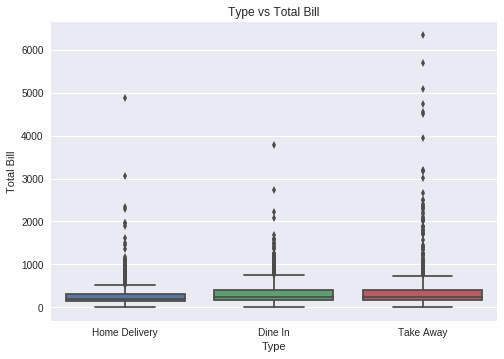

In [0]:
#2ac i) Bivariate con-cat of cbd by box-plot

plt.figure(1)
plt.title('Type vs Total Bill')
sns.boxplot(x = 'Type', y = 'Total Bill', data = cbd)


 Bivariate con-cat of cbd by Z-test/T-test : Either test assess whether mean of two groups are statistically different from each other or not.
 
 https://www.analyticsvidhya.com/wp-content/uploads/2015/02/ztestformula1.jpg

In [0]:
#2ac ii) Bivariate con-cat of cbd by Z-test/T-test
  

In [0]:
#Bivariate Cat-Con ANOVA
def bi_cat_con_anova(cat_label, con_label, data):
  features = {}
  features['grand_mean'] = 0
  features['I'] = len(data[cat_label].value_counts())
  features['total_samples'] = np.sum(data[cat_label].value_counts().values.tolist())
  
  i = 1
  
  for categ in data[cat_label].value_counts().index.tolist():
    features['g' + str(i)] = data.loc[data[cat_label] == categ, con_label]
    features['n' + str(i)] = len(features['g' + str(i)])
    features['x' + str(i)] = features['g' + str(i)].mean()
    features['grand_mean']+= features['x' + str(i)]/features['I']
    
    i+=1
    if i > features['I']:
      break
    
    
  features['sb2'] = np.sum(features['n' + str(i)] * np.power(features['x' + str(i)] - features['grand_mean'], 2) for i in range(1, features['I'] + 1))/(features['I']-1) 
  features['sw2'] = np.sum((features['n' + str(i)] - 1) * np.var(features['g' + str(i)], ddof = 1) for i in range(1, features['I'] + 1))/(features['total_samples'] - features['I'])
  features['f_stat'] = features['sb2']/features['sw2']
  features['df_num'] = features['I'] - 1
  features['df_denom'] = features['total_samples'] - features['I']
    
  
  return features

In [0]:
#ANOVA of Discount-Type in cbd
features = bi_cat_con_anova(cat_label = 'Type', con_label = 'Discount', data = cbd)
print(features['f_stat'])
print(features['df_num'])
print(features['df_denom'])

397.9312162853356
2
8375


In [0]:
#ANOVA of Discount-Channel in cbd
features = bi_cat_con_anova(cat_label = 'Channel', con_label = 'Discount', data = cbd)
print(features['f_stat'])
print(features['df_num'])
print(features['df_denom'])

512.3275044783312
3
8374


In [0]:
#ANOVA of Discount-Date_categ in cbd
features = bi_cat_con_anova(cat_label = 'Date_categ', con_label = 'Discount', data = cbd)
print(features['f_stat'])
print(features['df_num'])
print(features['df_denom'])

792.3508786286534
3
8374


In [0]:
#ANOVA of Total Bill-Type in cbd
features = bi_cat_con_anova(cat_label = 'Type', con_label = 'Total Bill', data = cbd)
print(features['f_stat'])
print(features['df_num'])
print(features['df_denom'])

334.70160942984495
2
8375


In [0]:
#ANOVA of Total Bill-Channel in cbd
features = bi_cat_con_anova(cat_label = 'Channel', con_label = 'Total Bill', data = cbd)
print(features['f_stat'])
print(features['df_num'])
print(features['df_denom'])

88.66716790837498
3
8374


In [0]:
#ANOVA of Total Bill-Date_categ in cbd
features = bi_cat_con_anova(cat_label = 'Date_categ', con_label = 'Total Bill', data = cbd)
print(features['f_stat'])
print(features['df_num'])
print(features['df_denom'])

35.501661238147605
3
8374


In [0]:
#ANOVA of Subtotal - Type in cbd
features = bi_cat_con_anova(cat_label = 'Type', con_label = 'Subtotal', data = cbd)
print(features['f_stat'])
print(features['df_num'])
print(features['df_denom'])

285.805299040474
2
8375


In [0]:
#ANOVA of Sub Total - Type in cbd
features = bi_cat_con_anova(cat_label = 'Channel', con_label = 'Subtotal', data = cbd)
print(features['f_stat'])
print(features['df_num'])
print(features['df_denom'])

67.36382297258396
3
8374


In [0]:
#ANOVA of Sub Total - Type in cbd
features = bi_cat_con_anova(cat_label = 'Date_categ', con_label = 'Subtotal', data = cbd)
print(features['f_stat'])
print(features['df_num'])
print(features['df_denom'])

15.09528107377617
3
8374


In [0]:
#ANOVA of Delivery Amt - Type in cbd
features = bi_cat_con_anova(cat_label = 'Type', con_label = 'Delivery Amt', data = cbd)
print(features['f_stat'])
print(features['df_num'])
print(features['df_denom'])

742.4827375669437
2
8375


In [0]:
#ANOVA of Delivery Amt - Channel in cbd
features = bi_cat_con_anova(cat_label = 'Channel', con_label = 'Delivery Amt', data = cbd)
print(features['f_stat'])
print(features['df_num'])
print(features['df_denom'])

105.0442799047381
3
8374


In [0]:
#ANOVA of Delivery Amt - Date_categ in cbd
features = bi_cat_con_anova(cat_label = 'Date_categ', con_label = 'Delivery Amt', data = cbd)
print(features['f_stat'])
print(features['df_num'])
print(features['df_denom'])

128.2910023130311
3
8374


In [0]:
#2ac iii) Bivariate con-cat of cbd by ANOVA (Khan Academy Notes)
features = bi_cat_con_anova(cat_label = 'Type', con_label = 'Total Bill', data = cbd)
print(features['f_stat'])
print(features['df_num'])
print(features['df_denom'])
#numerator will have I -1 df
#denom will have (n1-1) + (n2 -1) + (n3 -1) df

668.8997682978327
2
8375


Learn Two-Way Anova from https://www.youtube.com/watch?v=cNIIn9bConY
                                                  
https://www.technologynetworks.com/informatics/articles/one-way-vs-two-way-anova-definition-differences-assumptions-and-hypotheses-306553

P-Value from F-Ratio Calculator (ANOVA): https://www.socscistatistics.com/pvalues/fdistribution.aspx

3. MISSING VALUE TREATMENT

We looked at the importance of treatment of missing values in a dataset. Now, let’s identify the reasons for occurrence of these missing values. They may occur at two stages:

   i) Data Extraction: It is possible that there are problems with extraction process. In such cases, we should double-check for correct data with data guardians. Some hashing procedures can also be used to make sure data extraction is correct. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
   
   ii) Data collection: These errors occur at time of data collection and are harder to correct. They can be categorized in four types:
        
        Missing completely at random: This is a case when the probability of missing variable is same for all observations. For example: respondents of data collection process decide that they will declare their earning after tossing a fair coin. If an head occurs, respondent declares his / her earnings & vice versa. Here each observation has equal chance of missing value.
        
        Missing at random: This is a case when variable is missing at random and missing ratio varies for different values / level of other input variables. For example: We are collecting data for age and female has higher missing value compare to male.
        
        Missing that depends on unobserved predictors: This is a case when the missing values are not random and are related to the unobserved input variable. For example: In a medical study, if a particular diagnostic causes discomfort, then there is higher chance of drop out from the study. This missing value is not at random unless we have included “discomfort” as an input variable for all patients.
        
        Missing that depends on the missing value itself: This is a case when the probability of missing value is directly correlated with missing value itself. For example: People with higher or lower income are likely to provide non-response to their earning.


Which are the methods to treat missing values ?

    1) Deletion:  It is of two types: List Wise Deletion and Pair Wise Deletion. (Works for MCAR only)
    
    In list wise deletion, we delete observations where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.
    
    In pair wise deletion, we perform analysis with all cases in which the variables of interest are present. Advantage of this method is, it keeps as many cases available for analysis. One of the disadvantage of this method, it uses different sample size for different variables. ----can't understand----

In [0]:
#Pairwise deletion : TO DO

        2) Mean, Median and Mode Imputation
        
        Imputation is a method to fill in the missing values with estimated ones. The objective is to employ known relationships that can be identified in the valid values of the data set to assist in estimating the missing values. Mean / Mode / Median imputation is one of the most frequently used methods. It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable. It can be of two types:-

    Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median. Like in above table, variable “Manpower” is missing so we take average of all non missing values of “Manpower”  (28.33) and then replace missing value with it.
    
    Similar case Imputation: In this case, we calculate average for gender “Male” (29.75) and “Female” (25) individually of non missing values then replace the missing value based on gender. For “Male“, we will replace missing values of manpower with 29.75 and for “Female” with 25.


        3) Linear Regression

        To begin, several predictors of the variable with missing values are identified using a correlation matrix. The best predictors are selected and used as independent variables in a regression equation. The variable with missing data is used as the dependent variable. Cases with complete data for the predictor variables are used to generate the regression equation; the equation is then used to predict missing values for incomplete cases. In an iterative process, values for the missing variable are inserted and then all cases are used to predict the dependent variable. These steps are repeated until there is little difference between the predicted values from one step to the next, that is they converge.
        
        It “theoretically” provides good estimates for missing values. However, there are several disadvantages of this model which tend to outweigh the advantages. First, because the replaced values were predicted from other variables they tend to fit together “too well” and so standard error is deflated. One must also assume that there is a linear relationship between the variables used in the regression equation when there may not be one.

        4) Multiple imputation
        https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/
        
        The chained equation process can be broken down into four general steps:

    Step 1: A simple imputation, such as imputing the mean, is performed for every missing value in the dataset. These mean imputations can be thought of as “place holders.”
    
    Step 2: The “place holder” mean imputations for one variable (“var”) are set back to missing.
    
    Step 3: The observed values from the variable “var” in Step 2 are regressed on the other variables in the imputation model, which may or may not consist of all of the variables in the dataset. In other words, “var” is the dependent variable in a regression model and all the other variables are independent variables in the regression model. These regression models operate under the same assumptions that one would make when performing (e.g.,) linear, logistic, or Poison regression models outside of the context of imputing missing data.
    
    Step 4: The missing values for “var” are then replaced with predictions (imputations) from the regression model. When “var” is subsequently used as an independent variable in the regression models for other variables, both the observed and these imputed values will be used.
    
    Step 5: Steps 2–4 are then repeated for each variable that has missing data. The cycling through each of the variables constitutes one iteration or “cycle.” At the end of one cycle all of the missing values have been replaced with predictions from regressions that reflect the relationships observed in the data.
    
    Step 6: Steps 2 through 4 are repeated for a number of cycles, with the imputations being updated at each cycle. The number of cycles to be performed can be specified by the researcher. At the end of these cycles the final imputations are retained, resulting in one imputed dataset. Generally, ten cycles are performed (Raghunathan et al., 2002); however, research is needed to identify the optimal number of cycles when imputing data under different conditions. The idea is that by the end of the cycles the distribution of the parameters governing the imputations (e.g., the coefficients in the regression models) should have converged in the sense of becoming stable. This will, for example, avoid dependence on the order in which the variables are imputed. In practice, researchers can check the convergence by, for example, comparing the regression models at subsequent cycles, as discussed in He et al. (2009). Different MICE software packages vary somewhat in their exact implementation of this algorithm (e.g., in the order in which the variables are imputed), but the general strategy is the same.